# Trabalho Prático 02

## Nome: Jorge Lucas Colares Martins
## Matricula: 402119

## Contextualização

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

## Conteudo

1. pH value:<br>
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.<br><br>

2. Hardness:<br>
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.<br><br>

3. Solids (Total dissolved solids - TDS):<br>
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.<br><br>

4. Chloramines:<br>
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.<br><br>

5. Sulfate:<br>
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.<br><br>

6. Conductivity:<br>
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.<br><br>

7. Organic_carbon:<br>
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.<br><br>

8. Trihalomethanes:<br>
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.<br><br>

9. Turbidity:<br>
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.<br><br>

10. Potability:<br>
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.<br><br>


## Importando bibliotecas

In [497]:
import pandas as pd 
import numpy as np 

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
import plotly.graph_objects as go
import plotly.express as px
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.utils import resample


### Funções auxiliares

In [382]:
def hist_graph(y,title):
    labels = ['KNeighbors', 'Decision Tree', 'Random Forest', 'GradientBoosting', 'Perceptron', 'SVM']
    fig = px.bar(x=labels, y=y, color=labels, title=title, text=y,
        labels=dict(x="Algorithms", y="F1 Score", color="Algorithm")
    )
    fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
    fig.show()

## Importação dos dados

In [383]:
df = pd.read_csv("water_potability.csv",delimiter=',')
df.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2523,NaN,208.837711,11609.997159,6.445280,NaN,407.017398,7.070771,76.383521,3.813436,0
369,6.952512,211.697297,33737.288524,6.300871,NaN,395.407004,14.182396,39.802907,4.105495,1
1060,6.664935,218.770008,16477.350806,7.325001,299.846523,412.308588,17.192685,41.035789,4.502138,0
1772,9.610220,156.929546,33954.435471,4.639028,NaN,485.379156,11.047844,NaN,4.961972,0
814,6.365497,205.056536,7040.737621,11.302831,325.328543,371.579634,16.352858,74.312592,5.125417,1
3019,9.347345,201.632836,13749.596037,7.333742,322.044667,512.446305,12.434716,43.827119,3.615151,0
468,4.370477,188.654037,29542.338165,8.117114,301.022182,456.308454,16.346838,46.696941,4.649382,0
3232,6.360196,198.911449,13742.139487,7.441487,338.409576,423.625649,11.915900,57.713149,2.713248,1
349,8.065339,174.120584,21366.283598,7.490944,315.180405,497.019234,11.417019,46.213198,3.756392,1
633,5.433242,201.781246,31157.110167,7.286392,304.425275,451.557178,10.842095,87.634013,3.675718,0


## Analise dos dados

In [384]:
print("Tipos de dados: \n", df.dtypes,"\n\n")
print("Número de dados no Dataset: ",df.shape,"\n\n")
print("Número de NaN no dataset: ",df.isnull().values.sum());

Tipos de dados: 
 ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object 


Número de dados no Dataset:  (3276, 10) 


Número de NaN no dataset:  1434


<AxesSubplot:>

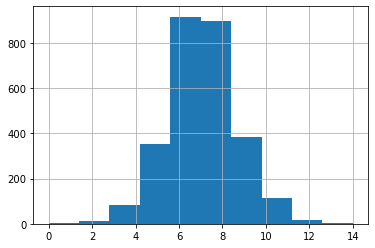

In [385]:
ft = df['ph']
ft.hist()

<AxesSubplot:>

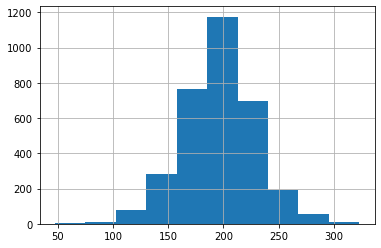

In [386]:
ft = df['Hardness']
ft.hist()

<AxesSubplot:>

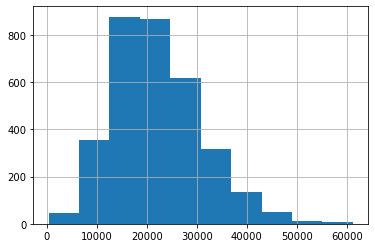

In [387]:
ft = df['Solids']
ft.hist()

<AxesSubplot:>

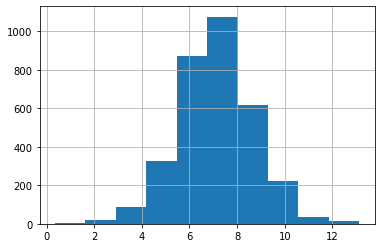

In [388]:
ft = df['Chloramines']
ft.hist()

<AxesSubplot:>

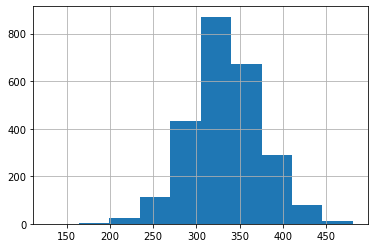

In [389]:
ft = df['Sulfate']
ft.hist()

<AxesSubplot:>

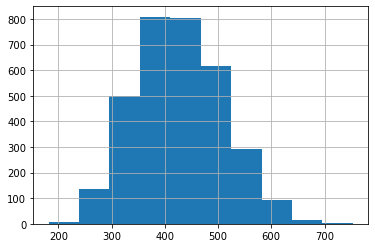

In [390]:
ft = df['Conductivity']
ft.hist()

<AxesSubplot:>

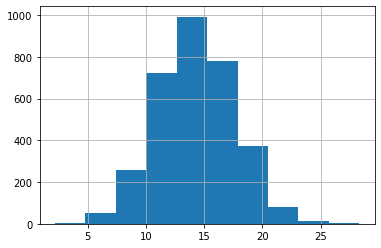

In [391]:
ft = df['Organic_carbon']
ft.hist()

<AxesSubplot:>

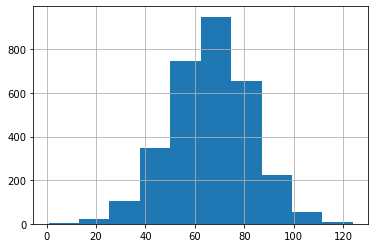

In [392]:
ft = df['Trihalomethanes']
ft.hist()

<AxesSubplot:>

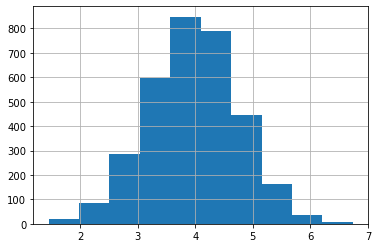

In [393]:
ft = df['Turbidity']
ft.hist()

In [394]:
fig = px.pie(df, names='Potability')
fig.show()

## Pré Processamento

### Retirando os NaN

In [395]:
df.dropna(axis=0, inplace=True)
print("Número de dados no Dataset: ",df.shape,"\n")
print("Número de NaN no dataset: ",df.isnull().values.sum())

df.sample(10)

Número de dados no Dataset:  (2011, 10) 

Número de NaN no dataset:  0


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2927,8.288765,211.452744,11234.041471,6.385510,360.843311,525.088611,15.098571,62.999999,3.580523,0
611,7.386838,189.595814,29122.696997,8.420763,321.567764,458.044171,17.196943,56.769915,4.816705,0
2415,7.496991,246.863581,22631.657727,3.440880,297.132449,357.498459,16.141286,79.705530,3.837926,1
2102,9.032563,156.265649,24897.557030,7.639634,416.530533,342.746040,13.599564,62.502108,3.626136,0
730,8.129342,211.123312,22982.927445,6.779005,326.397953,367.988784,13.910933,55.795357,4.822044,1
1494,5.289618,194.056393,21776.170174,6.278293,359.099733,353.772930,14.181471,33.592031,4.548100,1
740,7.061846,211.091687,11300.238109,8.866359,299.938071,353.510425,16.895754,67.577109,3.958249,1
1226,5.327024,233.140588,13580.618483,7.362411,356.420271,438.553499,10.049772,55.232271,4.855821,1
1237,5.363363,179.911380,27045.929958,6.520855,311.467406,408.922517,9.704704,79.484801,3.871372,0
265,7.788055,212.691457,29879.060146,6.998962,360.668259,359.569082,14.828743,83.856336,3.368757,1


In [396]:
fig = px.pie(df, names='Potability')
fig.show()

### Balanceamento

In [481]:
zero  = df[df['Potability']==0]  
one = df[df['Potability']==1]

df_minority_upsampled = resample(one, replace = True, n_samples = 1200)
df = pd.concat([zero, df_minority_upsampled])
from sklearn.utils import shuffle
df = shuffle(df)



In [496]:
fig = px.pie(df, names='Potability')
fig.show()

### Divisão treino e teste

In [495]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state= 14, stratify=y_smote)

### Treinando modelos sem Grid

In [483]:
train_list = []

knn = KNeighborsClassifier().fit(X_train,y_train)
train_list.append(knn)

dt = DecisionTreeClassifier(random_state=14).fit(X_train,y_train)
train_list.append(dt)

rf = RandomForestClassifier(random_state=14).fit(X_train,y_train)
train_list.append(rf)

gb = GradientBoostingClassifier(random_state=14).fit(X_train,y_train)
train_list.append(gb)

pc = Perceptron(random_state=14).fit(X_train,y_train)
train_list.append(pc)

svc = svm.SVC(random_state=14).fit(X_train,y_train)
train_list.append(svc)



In [484]:
f1_list = []
for i in train_list:
    y_pred_test = i.predict(X_test)
    print('---------------------------------------------------------------------\n',classification_report(y_test, y_pred_test) ,'---------------------------------------------------------------------\n')
    f1_list.append(metrics.f1_score(y_test, y_pred_test))



hist_graph(y=f1_list,title='F1 Score sem GridSearch')    

---------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.74      0.60      0.66       248
           1       0.65      0.78      0.70       232

    accuracy                           0.69       480
   macro avg       0.69      0.69      0.68       480
weighted avg       0.69      0.69      0.68       480
 ---------------------------------------------------------------------

---------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.89      0.68      0.77       248
           1       0.73      0.91      0.81       232

    accuracy                           0.79       480
   macro avg       0.81      0.80      0.79       480
weighted avg       0.81      0.79      0.79       480
 ---------------------------------------------------------------------

--------------------------------------------------------------

### Usando GridSearch para treinar

In [485]:
labels = ['KNeighbors', 'Decision Tree', 'Random Forest', 'GradientBoosting', 'Perceptron', 'SVM']
f1_grid_score = []
best_params_list = []

#### Knn

In [486]:
params_knn = {'n_neighbors':np.arange(1, 15)}
grid_knn = GridSearchCV(knn, param_grid=params_knn, cv=5, scoring='f1').fit(X_train, y_train)
grid_knn_f1 = grid_knn.best_score_
print(grid_knn.best_params_)
print(grid_knn_f1)
best_params_list.append(grid_knn.best_params_)
f1_grid_score.append(grid_knn_f1)

{'n_neighbors': 1}
0.802278746185569


#### Decision Tree

In [487]:
params_dt = {'max_depth' : np.arange(1, 30)}
grid_dt = GridSearchCV(dt, param_grid=params_dt, cv=5, scoring='f1').fit(X_train, y_train)
grid_dt_f1 = grid_dt.best_score_
print(grid_dt.best_params_)
print(grid_dt_f1)
best_params_list.append(grid_dt.best_params_)
f1_grid_score.append(grid_dt_f1)

{'max_depth': 24}
0.8108771645969017


#### Random Forest

In [488]:
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5, scoring='f1').fit(X_train, y_train)
grid_rf_f1 = grid_rf.best_score_
print(grid_rf.best_params_)
print(grid_rf_f1)
best_params_list.append(grid_rf.best_params_)
f1_grid_score.append(grid_rf_f1)

{'min_samples_leaf': 2, 'n_estimators': 200}
0.8819737902155369


#### Gadrient Boosting

In [489]:
params_gb = {'n_estimators' : [100, 200, 300, 400, 500, 600, 700]}
grid_gb = GridSearchCV(gb, param_grid=params_gb, cv=5, scoring='f1').fit(X_train, y_train)
grid_gb_f1 = grid_gb.best_score_
print(grid_gb.best_params_)
print(grid_gb_f1)
best_params_list.append(grid_gb.best_params_)
f1_grid_score.append(grid_gb_f1)

{'n_estimators': 700}
0.8443354781411563


#### Perceptron

In [490]:
params_pc = {'max_iter' : [200, 300, 400, 500], 'tol': np.logspace(-6,-1,6)}
grid_pc = GridSearchCV(pc, param_grid=params_pc, cv=5, scoring='f1').fit(X_train, y_train)
grid_pc_f1 = grid_pc.best_score_
print(grid_pc.best_params_)
print(grid_pc_f1)
best_params_list.append(grid_pc.best_params_)
f1_grid_score.append(grid_pc_f1)

{'max_iter': 200, 'tol': 1e-06}
0.45467766274145094


#### SVC

In [491]:
params_svm = {'kernel' : ['rbf', 'sigmoid'], 'cache_size' : [2, 5, 10, 15, 25, 50, 100]}
grid_svm = GridSearchCV(svc, param_grid=params_svm, cv=5, scoring='f1').fit(X_train, y_train)
grid_svm_f1 = grid_svm.best_score_
print(grid_svm.best_params_)
print(grid_svm_f1)
best_params_list.append(grid_svm.best_params_)
f1_grid_score.append(grid_svm_f1)

{'cache_size': 2, 'kernel': 'sigmoid'}
0.5107768161519127


In [492]:
d = {'Labels': labels, 'Best Params' : best_params_list, 'F1_Score' : f1_grid_score}
df_grid_score = pd.DataFrame(data = d)
df_grid_score.sort_values(by='F1_Score', ascending=False)


hist_graph(y=f1_grid_score,title='F1 Score sem GridSearch') 
df_grid_score.sort_values(by='F1_Score', ascending=False)  

,Labels,Best Params,F1_Score
2,Random Forest,"{'min_samples_leaf': 2, 'n_estimators': 200}",0.881974
3,GradientBoosting,{'n_estimators': 700},0.844335
1,Decision Tree,{'max_depth': 24},0.810877
0,KNeighbors,{'n_neighbors': 1},0.802279
5,SVM,"{'cache_size': 2, 'kernel': 'sigmoid'}",0.510777
4,Perceptron,"{'max_iter': 200, 'tol': 1e-06}",0.454678


### Utilizando melhor algoritimo com melhores parametros

In [494]:
rf = RandomForestClassifier(min_samples_leaf= 2, n_estimators=200 ,random_state=14).fit(X_train,y_train)

y_pred_test = rf.predict(X_test)
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       248
           1       0.91      0.91      0.91       232

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480

